# 0.1-100µM Ag 


In [76]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-15);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%available_graphics_toolkits()
%loaded_graphics_toolkits

In [101]:
%0.1µM 

AgT=1e-7; pH=7; pe=20.75-pH; logClT=-12:0.02:-2; ClT=10.^logClT;

In [102]:
% MODEL USING PHREEQC

for i=1:length(ClT);

minerals=[{'AgCls'};]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgCls.dat']; 

tic;
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

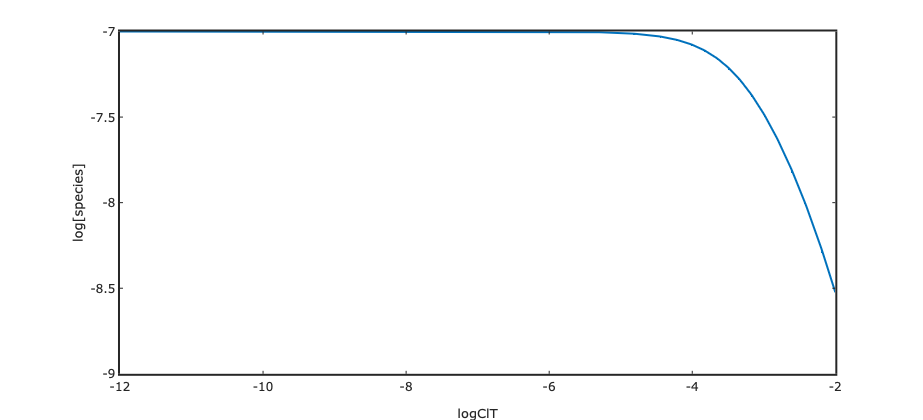

Execution exception: parse error:

  syntax error




In [103]:
%h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
h=plot(log10(ClT),log10(Ag));
set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logClT'); ylabel('log[species]');
%xlabel('logCl'); ylabel('logAg');
%legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','location','eastoutside')
%axis([-12 0 -40 -1])
%exportforplot=[...
%log10(Ag)' log10(Cl)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]

end

In [65]:
%1µM
AgT=1e-6; pH=7; pe=20.75-pH; ClT=1e-12:0.001:1e-2;

In [66]:
% MODEL USING PHREEQC

for i=1:length(ClT);

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgCls.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

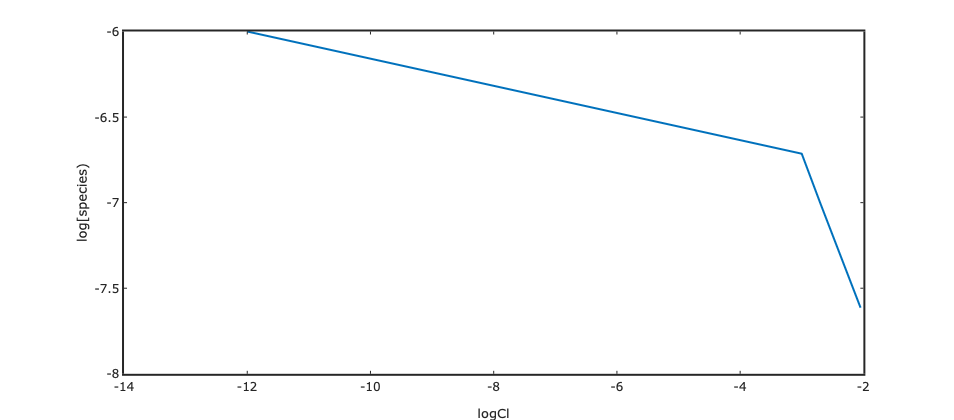

Execution exception: parse error:

  syntax error




In [75]:
h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
%h=plot(log10(ClT),log10(Ag));
set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logCl'); ylabel('log[species)');
%xlabel('logCl'); ylabel('logAg');
legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','location','eastoutside')
%axis([-40 0 -8.5 -5])

end

In [51]:
#10µM
AgT=1e-5; pH=7; pe=20.75-pH; ClT=1e-12:0.001:1e-2;

In [52]:
% MODEL USING PHREEQC

for i=1:length(ClT);

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgCls.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

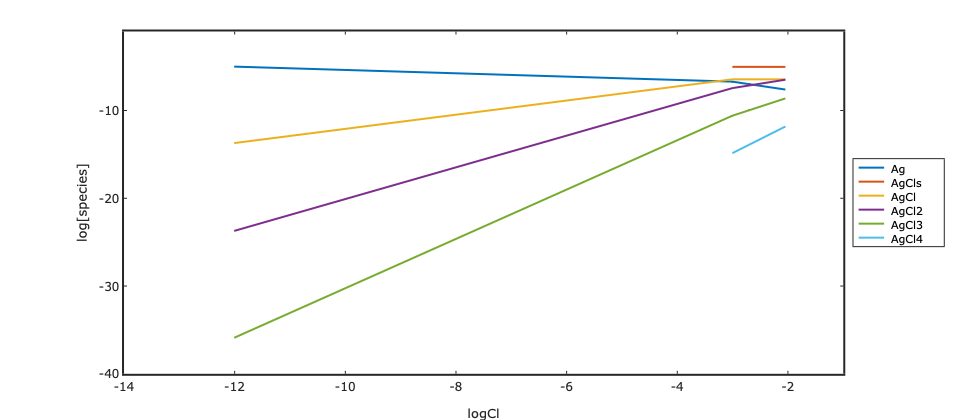

Execution exception: parse error:

  syntax error




In [57]:
h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
%h=plot(log10(ClT),log10(Ag));
set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logCl'); ylabel('log[species]');
%xlabel('logCl'); ylabel('logAg');
legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','location','eastoutside')
axis([-14 -1 -40 -1])


end

In [47]:
%100µM
AgT=1e-4; pH=7; pe=20.75-pH; ClT=1e-12:0.01:1e-2;

In [48]:
% MODEL USING PHREEQC

for i=1:length(ClT);

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgCls.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

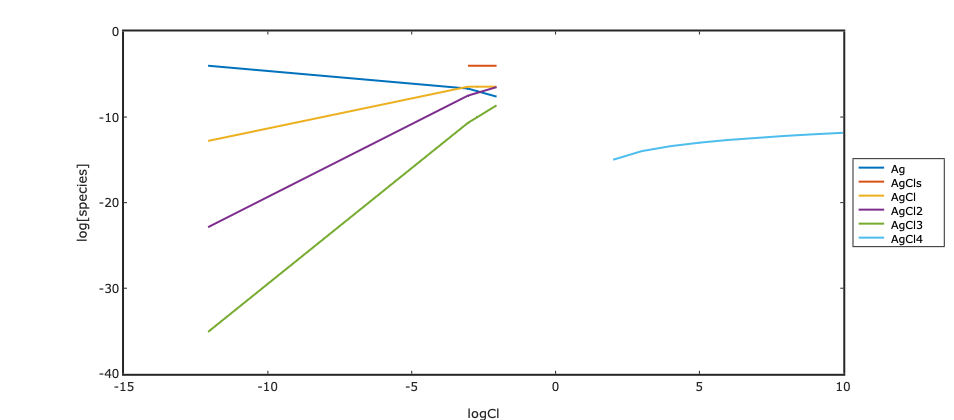

Execution exception: parse error:

  syntax error




In [50]:
h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
%h=plot(log10(Cl),log10(Ag));
%h=plot(log10(Cl),log10(AgCls));
set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logCl'); ylabel('log[species]');
%xlabel('logCl'); ylabel('logAg');
legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','location','eastoutside')
%axis([-40 0 -8 -3])

end

In [ ]:

%AgT=1e-6; BrT=1e-5; IT=1e-5; pH=7; pe=20.75-pH; ClT=1e-8:0.001:1e-2; 
AgT=1e-6; BrT=1e-2; IT=1e-2; pH=7; pe=20.75-pH; ClT=1e-8:0.00001:1e-2; 

In [ ]:
% MODEL USING PHREEQC

for i=1:length(ClT)
%j=1:length(BrT)
%k=1:length(IT)
 
%minerals=[{'AgBrs'};{'AgCls'};{'AgIs'}]; totalvector=[AgT; BrT(j); ClT(i); IT(k); ClT(i)+BrT(j)+IT(k)]; totalnames=[{'Ag'}; {'Br'}; {'Cl'}; {'I'}; {'Na'}]; 
minerals=[{'AgBrs'};{'AgCls'};{'AgIs'}]; totalvector=[AgT; BrT; ClT(i); IT; ClT(i)+BrT+IT]; totalnames=[{'Ag'}; {'Br'}; {'Cl'}; {'I'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Br-'};{'Cl-'};{'I-'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'};{'AgI'};{'AgI2-'};{'AgI3-2'};{'AgI4-3'}];
acid=['NaOH']; show=1; T=25;
database=['complexAgClBrIs.dat']; 


tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

AgPHREEQC(i)=solutionspeciesconcs(1); 
BrPHREEQC(i)=solutionspeciesconcs(2); 
ClPHREEQC(i)=solutionspeciesconcs(3);
IPHREEQC(i)=solutionspeciesconcs(4);
AgBrPHREEQC(i)=solutionspeciesconcs(5); 
AgBr2PHREEQC(i)=solutionspeciesconcs(6);
AgBr3PHREEQC(i)=solutionspeciesconcs(7);
AgBr4PHREEQC(i)=solutionspeciesconcs(8);
AgClPHREEQC(i)=solutionspeciesconcs(9);
AgCl2PHREEQC(i)=solutionspeciesconcs(10);
AgCl3PHREEQC(i)=solutionspeciesconcs(11);
AgCl4PHREEQC(i)=solutionspeciesconcs(12);
AgIPHREEQC(i)=solutionspeciesconcs(13);
AgI2PHREEQC(i)=solutionspeciesconcs(14);
AgI3PHREEQC(i)=solutionspeciesconcs(15);
AgI4PHREEQC(i)=solutionspeciesconcs(16);
AgBrsPHREEQC(i)=solidconcs(1);
AgClsPHREEQC(i)=solidconcs(2);
AgIsPHREEQC(i)=solidconcs(3);

end

In [ ]:
%h=plot(logAg,log10(Ag),logAg,log10(AgCls),logAg,log10(AgCl),logAg,log10(AgCl2),logAg,log10(AgCl3),logAg,log10(AgCl4),logAg,log10(Cl));
h=plot(log10(Cl),log10(Ag),log10(Br),log10(Ag),log10(I),log10(Ag));
set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('log[species]'); ylabel('logAg');
legend('Cl','Br','I','location','eastoutside')
%axis([-14 -1 -9 -6])
exportforplot=[...
log10(Ag)' log10(Br)' log10(Cl)' log10(I)'
]

end